# Milestone 3 - EDA

# what is my aim with EDA? 
- Explore the dataset, understand what might be driving the machine failures.
- forecast when the machine might fail.

In [2]:
# Imports 
import DataFrameInfo_class as info
import pandas as pd 
import numpy as np
from scipy.stats import normaltest 
from scipy import stats
from statsmodels.graphics.gofplots import qqplot 
import matplotlib.pyplot as plt
import seaborn as sns
import DataFrameInfo_class as info
from IPython.display import display
from scipy.stats import pointbiserialr

In [155]:
# Load data 
# Note that the CSV we are reading is the one after running DT_v4
failure_data = pd.read_csv('failure_data_after_data_transformation.csv')

In [156]:
# Patch, drop 'Unnamed: 0.1', 'Unnamed: 0'
failure_data.columns
failure_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

failure_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,3416,L50595,L,301.4,310.4,1579,36.9,133.0,0,0,0,0,0,0,0,1,0
1,7130,L54309,L,300.6,310.0,1635,31.0,107.0,0,0,0,0,0,0,0,1,0
2,2320,M17179,M,299.2,308.8,1700,33.5,185.0,0,0,0,0,0,0,0,0,1
3,9601,M24460,M,298.9,310.0,1561,45.3,58.0,0,0,0,0,0,0,0,0,1
4,614,L47793,L,298.1,309.9,1634,30.0,53.0,0,0,0,0,0,0,0,1,0


# Classes

In [360]:
class DataFrameInfo:
    def __init__(self, df):
        self.df = df 
    
    def print_df(self):
        print(self.df)
    
    def print_head(self):
        print(self.df.head())

    def data_type(self):
        print(self.df.dtypes)
    
    def return_info(self):
        return self.df.info()
    
    def describe_statistics(self):
        return self.df.describe().loc[['mean', 'std', '50%']]
    
    def unique_value_count(self, column_names):
        return self.df[column_names].nunique()
    
    def percentage_of_null(self):
        percentage_of_null = self.df.isnull().sum() / len(self.df) * 100  
        return percentage_of_null
    
    def are_all_observations_unique(self, column_name):
        print(f'The {column_name} column contains only unique rows: {len(self.df) == self.df[column_name].nunique()}')
    
    def normal_test(self, column_name):
        stat, p = normaltest(self.df[column_name], nan_policy = 'omit')
        print('Statistics=%.3f, p=%.3f' % (stat, p))

    def print_mean(self, column_name):
        print(f'The mean of {column_name} is {self.df[column_name].mean()}')
    
    def print_median(self, column_name):
        print(f'The median of {column_name} is {self.df[column_name].median()}')

    def column_names(self):
        return self.df.columns

    def continous_variables(self):
        continous_variables = []
        for i in self.df.columns:
            if self.df[i].nunique() > 2:
                continous_variables.append(i)
        return continous_variables
    
    def z_score_info(self, z_scores):
        # Z-score Threshold 
        threshold_2 = 2 
        threshold_3 = 3
        # z_scores = udi_process_temp_df_z['z_scores']

        outliers_2 = (np.abs(z_scores) > threshold_2).sum() 
        outliers_3 = (np.abs(z_scores) > threshold_3).sum()

        percentage_outliers_thereshold_2 = round(outliers_2/len(z_scores) * 100, 2)
        percentage_outliers_thereshold_3 = round(outliers_3/len(z_scores) * 100, 2)

        print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_2}")
        print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
        print("\n")
        print(f"Number of observations with outliers based on z-score threshold ±3: {outliers_3}")
        print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")


In [ ]:
# class DataFrameInfo:
#     def __init__(self, df):
#         self.df = df 
#     def z_score_info(z_scores):
#         # Z-score Threshold 
#         threshold_2 = 2 
#         threshold_3 = 3
#         # z_scores = udi_process_temp_df_z['z_scores']

#         outliers_2 = (np.abs(z_scores) > threshold_2).sum() 
#         outliers_3 = (np.abs(z_scores) > threshold_3).sum()

#         percentage_outliers_thereshold_2 = round(outliers_2/len(z_scores) * 100, 2)
#         percentage_outliers_thereshold_3 = round(outliers_3/len(z_scores) * 100, 2)

#         print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_2}")
#         print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
#         print("\n")
#         print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_3}")
#         print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")
    

In [133]:
test = DataFrameInfo(failure_data)
test.continous_variables()

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [273]:
class DataTransform:
    def __init__(self, df):
        self.df = df
        #self.info = df.info()

    def return_shape(self):
        return str(self.df.shape) 
    
    def return_info(self):
        return self.df.info()
    
    def return_first_row(self):
         return self.df.iloc[0]

    def unique_observations(self, column_name):
        return self.df[column_name].unique()
    
    def convert_column_to_category(self, column_name):
        '''
        converts the dtype of column to 'category'
        '''
        self.df[column_name] = pd.Categorical(self.df[column_name])
        return self.df
    
    def create_dummies_from_column(self, column_name):
        dummies_df = pd.get_dummies(self.df[column_name], dtype=int)
        return dummies_df 

    def concat_dataframes(self, new_df, left_index=True, right_index=True):
        '''
        This functions joins on the index of the LEFT DataFrame
        '''
        joined_df = pd.concat([self.df, new_df], axis = 1)
        return joined_df
    
    def yeojohnson(self, column_name):
        yeojohnson_var = self.df[column_name]
        yeojohnson_var, _ = stats.yeojohnson(yeojohnson_var) # The '_' ignores the second parameter, in this case it is the lambda parameter 
        yeojohnson_var = pd.Series(yeojohnson_var)
        return yeojohnson_var
    
    def z_score(self, column): # takes in a column and creates z scores, 
        x = self.df[column] 
        mean= np.mean(x)
        standard_deviation = np.std(x)
        z_scores = (x - mean) / standard_deviation
        return z_scores



In [335]:
# test 

# dt = DataTransform(failure_data_cleaned_unskewed)
# dt.z_score('Process temperature [K]').tail(10)
# z_score(failure_data_cleaned_unskewed, 'Process temperature [K]').tail(10)

# Add this to DT class 

In [135]:
# testing 
# dt = DataTransform(failure_data_without_null)
# dt.yeojohnson('Air temperature [K]')

In [341]:
# Plotter Class

class Plotter: 
    def __init__(self, df):
        self.df = df 
    
    def plot_hist(self, column_name):
        self.df[column_name].hist(bins = 40)
        plt.show()
    
    def plot_qq(self, column_name):
        qq_plot= qqplot(self.df[column_name], scale=1, line ='q')
        plt.show()
    
    def scatter(self, column_name):
        scatter_plot = sns.scatterplot(self.df[column_name])
        plt.show()
    def boxplot(self, column):
        box_plot = sns.boxplot(self.df[column])
        plt.show()


In [343]:
# test
# plott = Plotter(failure_data_cleaned_unskewed_no_outliers)
# plott.boxplot('Process temperature [K]')

In [9]:
# add analysis from plotter_v2.py
# The majority of this is for skewness 

# brain dump 
# use the missing data analysis and put it here from the longer script 
# perform treatement for any skewed data 
# data transformations
# update the DataTransformation Class 
# data cleaning:
    # data info 
    # MCAR / MAR / NMAR? - I have answered this a little.

# Remove / impute missing values 

- See plotter_v2 for the reasoning

In [157]:
# The following Data Transformation act as a treatement to missing data in the data set 

# Treating the NULL values 
failure_data['Air temperature [K]'] = failure_data['Air temperature [K]'].fillna(failure_data['Air temperature [K]'].median())
failure_data['Process temperature [K]'] = failure_data['Process temperature [K]'].fillna(failure_data['Process temperature [K]'].median())
failure_data.dropna(subset='Tool wear [min]', inplace=True)
# create a new variable after treating the null variables
failure_data_without_null = failure_data

# TODO: include the resoning from plotter_v2 
# TODO: update the Data transformation class with a method for checking if the data has NULL values and methods for the above data transformations 

In [158]:
# Prove that the new transformed data contails no missing values 
info_df_without_null = DataFrameInfo(failure_data_without_null)
info_df_without_null.percentage_of_null()



UDI                        0.0
Product ID                 0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Machine failure            0.0
TWF                        0.0
HDF                        0.0
PWF                        0.0
OSF                        0.0
RNF                        0.0
H                          0.0
L                          0.0
M                          0.0
dtype: float64

# Investigating for Skewness in the data 

<Axes: >

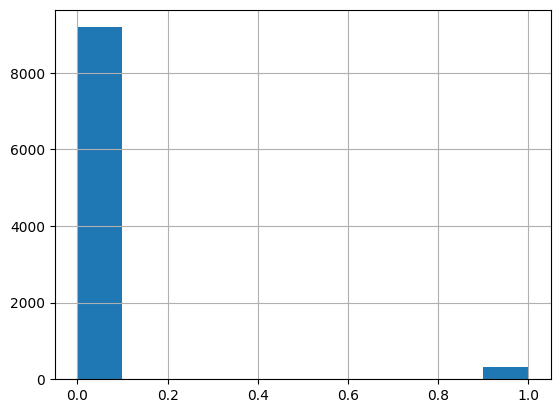

In [13]:
# measuring skewness 
# Begin with our dependant variable "Machine failure". As it's binary data, we will visualise the frequency of the data 

failure_data_without_null['Machine failure'].hist()

# Strongly biased towards `0` indicating that majority of the data gives information about machines that did NOT fail during the manufacturing process.


In [14]:
# Identify variables with continuous data types. 
# Continous data is defined by data with more than two unique values 
# create a table with the variable names and another column for variable data type 


variable_name = []
variable_description = []


for i in failure_data_without_null.columns:
    variable_name.append(i)
    if failure_data_without_null[i].nunique() > 2:
        variable_description.append("continous data")
    else:
        variable_description.append('other data type')



variable_info = pd.DataFrame({
    'variable_name': variable_name,
    'variable_description': variable_description
})

display(variable_info)



# Scratch work 
    # if failure_data_without_null[i].nunique() > 2:
    #     variable_info.append('continous variable')
    # else:
    #     print('binary')


# for column in df: 
#     if number_of_unique values are > 2 then "continous variable"



,variable_name,variable_description
0,UDI,continous data
1,Product ID,continous data
2,Type,continous data
3,Air temperature [K],continous data
4,Process temperature [K],continous data
5,Rotational speed [rpm],continous data
6,Torque [Nm],continous data
7,Tool wear [min],continous data
8,Machine failure,other data type
9,TWF,other data type


In [130]:
# filter for the variables that are the 'other data type' 

print(failure_data_without_null[['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M']])
# It is clear that all the 'other data types' are binary data 
# change the labelling 
variable_info['variable_description'] = variable_info['variable_description'].replace('other data type', 'binary')


display(variable_info)

# Scratch work 
#variable_info['variable_description'] == 'other data type'

# for i in variable_info['variable_description']:
#     if i == 'other data type':
#         i = 'binary'
#     print(i)

# if i in variable_info['variable_description'] == 'other data type':
#     variable_info['variable_decription'] = 'binary'


      TWF  HDF  PWF  OSF  RNF  H  L  M
0       0    0    0    0    0  0  1  0
1       0    0    0    0    0  0  1  0
2       0    0    0    0    0  0  0  1
3       0    0    0    0    0  0  0  1
4       0    0    0    0    0  0  1  0
...   ...  ...  ...  ...  ... .. .. ..
9995    0    0    0    0    0  0  0  1
9996    0    0    0    0    0  0  0  1
9997    0    0    0    0    0  0  1  0
9998    0    0    0    0    0  0  1  0
9999    0    0    0    0    0  0  1  0

[9516 rows x 8 columns]


,variable_name,variable_description
0,UDI,continous data
1,Product ID,continous data
2,Type,continous data
3,Air temperature [K],continous data
4,Process temperature [K],continous data
5,Rotational speed [rpm],continous data
6,Torque [Nm],continous data
7,Tool wear [min],continous data
8,Machine failure,binary
9,TWF,binary


In [15]:
# use a heatmap to see variables of interest. 
# investigate the skewness of the continous variables 

# sns.heatmap(failure_data_without_null, )

failure_data_without_null.head()
# drop string variables 
    # drop `Product ID` as we have UDI and Type 
    # drop `Type`

#DataTransformation
#failure_data_without_null.drop(['Type', 'Product ID'], axis = 1, inplace=True)

sns.heatmap(failure_data_without_null.corr(), cmap= 'coolwarm' )

#failure_data_without_null

ValueError: could not convert string to float: 'L50595'

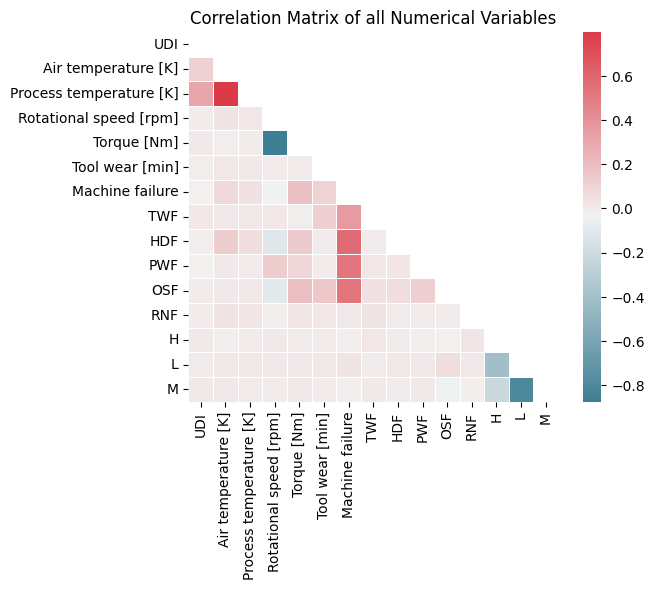

In [137]:
corr = failure_data_without_null.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

In [ ]:
# The dependant variable `Machine failure` is binary, therefore the above Pearsons's correlation approach is only appropriate for two continous variables. 
# Use Point-biserial correlation coefficient (PBC) instead. This is specifically designed for the case where the dependant variable is binary.



#### Point-biserial correlation
- It ranges from −1 to 1, where −1 indicates a perfect negative association between the variables, 0 indicates no association, and 1 indicates a perfect positive association.

In [16]:
# Example using the dependant variable and `Air Temperature `

# Calculate the point-biserial correlation and p-value
r_pb, p_value = pointbiserialr(failure_data_without_null['Machine failure'], failure_data_without_null['Air temperature [K]'])

# Print the results with an explainable statement
print(f"The point-biserial correlation coefficient between 'Machine failure' and 'Air temperature [K]' is {round(r_pb, 3)} with a p-value of {round(p_value, 4)}.")
print("The null hypothesis is that there is no correlation between 'Machine failure' and 'Air temperature [K]' (r_pb = 0).")

# Interpretation of the p-value
if p_value < 0.05:
    print("Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation.")
else:
    print("Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant correlation.")

# Interpretation of the r_pb value
if r_pb > 0:
    direction = "positive"
else:
    direction = "negative"

strength = ""
abs_r_pb = abs(r_pb)
if abs_r_pb < 0.1:
    strength = "negligible"
elif abs_r_pb < 0.3:
    strength = "weak"
elif abs_r_pb < 0.5:
    strength = "moderate"
else:
    strength = "strong"

print(f"The correlation is {direction} and the strength of the correlation is {strength}.")


The point-biserial correlation coefficient between 'Machine failure' and 'Air temperature [K]' is 0.077 with a p-value of 0.0.
The null hypothesis is that there is no correlation between 'Machine failure' and 'Air temperature [K]' (r_pb = 0).
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation.
The correlation is positive and the strength of the correlation is negligible.


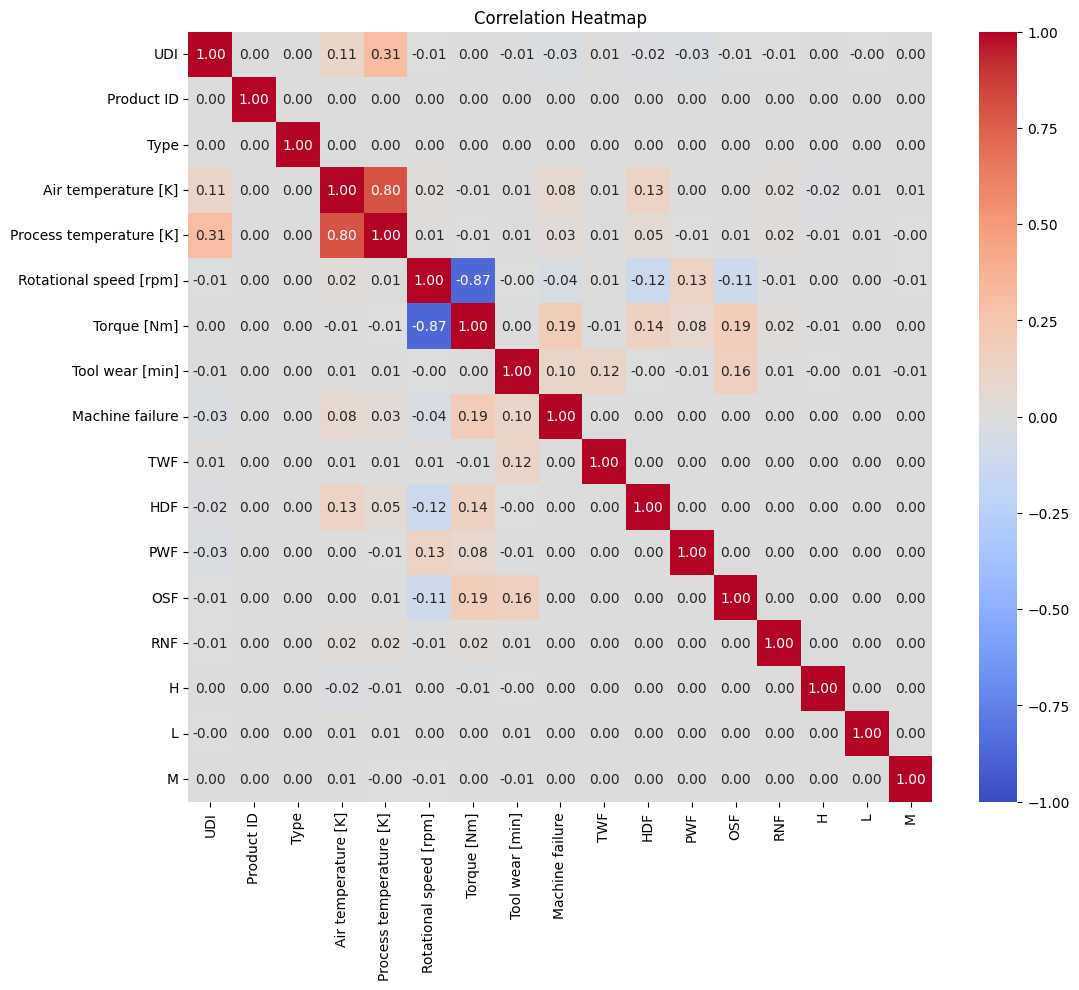

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Identify binary and continuous variables
binary_vars = [col for col in failure_data_without_null.columns if failure_data_without_null[col].nunique() == 2]
continuous_vars = [col for col in failure_data_without_null.columns if failure_data_without_null[col].dtype in ['int64', 'float64'] and failure_data_without_null[col].nunique() > 2]

# Initialize the correlation matrix
corr_matrix = pd.DataFrame(np.zeros((len(failure_data_without_null.columns), len(failure_data_without_null.columns))), index=failure_data_without_null.columns, columns=failure_data_without_null.columns)

# Compute correlations
for var1 in failure_data_without_null.columns:
    for var2 in failure_data_without_null.columns:
        if var1 == var2:
            corr_matrix.loc[var1, var2] = 1.0  # Correlation with itself is 1
        elif var1 in binary_vars and var2 in continuous_vars:
            r_pb, _ = pointbiserialr(failure_data_without_null[var1], failure_data_without_null[var2])
            corr_matrix.loc[var1, var2] = r_pb
            corr_matrix.loc[var2, var1] = r_pb
        elif var1 in continuous_vars and var2 in continuous_vars:
            r_pearson, _ = pearsonr(failure_data_without_null[var1], failure_data_without_null[var2])
            corr_matrix.loc[var1, var2] = r_pearson
            corr_matrix.loc[var2, var1] = r_pearson

# Plot the heatmap with annotations rounded to 2 decimal places
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [19]:
# There is neither a strong positive or negative correlation between `Machine failure` and the independant variables. Look at mesuring skewness of each continous variables



In [21]:
info.continous_variables()

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [94]:
# Define a function for skewness
    # Takes in the data frame 

info = DataFrameInfo(failure_data_without_null)
# info.normal_test(column_name="UDI")
# info.column_names()

normal_test_result = []

for i in info.continous_variables():
    print(i)
    print('\n')
    print(f'{i} :')
    normal_test_result.append(info.normal_test(i))


    # if p < 0.01:
    #     print('reject the null hypothesis. The data is skewed')
    # else:
    #     print('accept the null hypothesis. The data is normally distributed')

# TODO: fix this 

UDI


UDI :
Statistics=8041.851, p=0.000
Product ID


Product ID :


TypeError: unsupported operand type(s) for /: 'str' and 'int'

Air temperature [K]


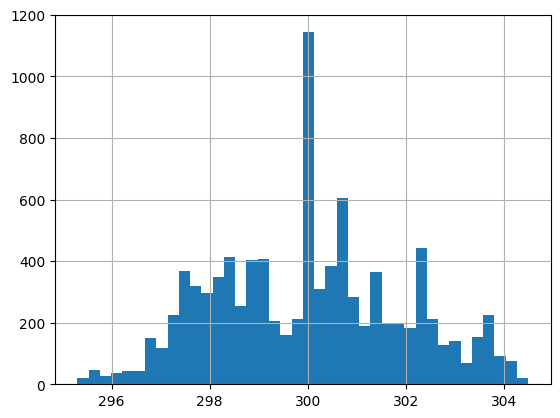

Process temperature [K]


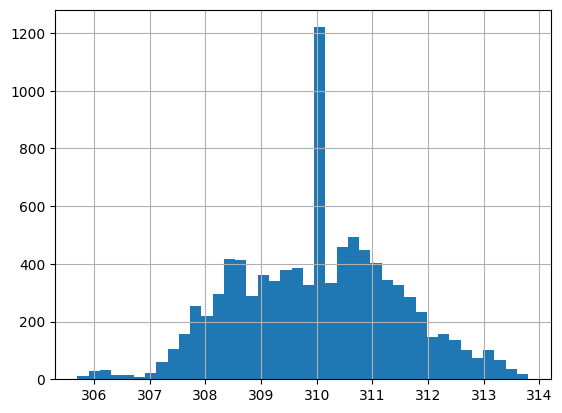

Rotational speed [rpm]


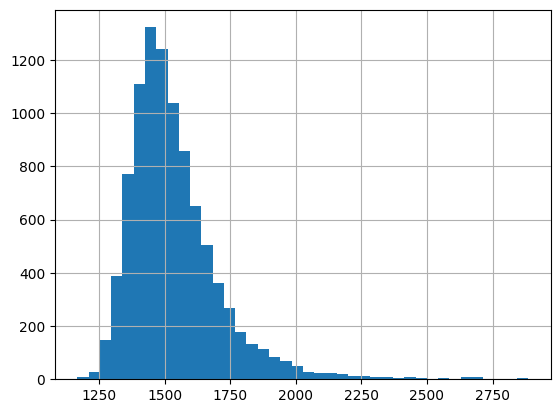

Tool wear [min]


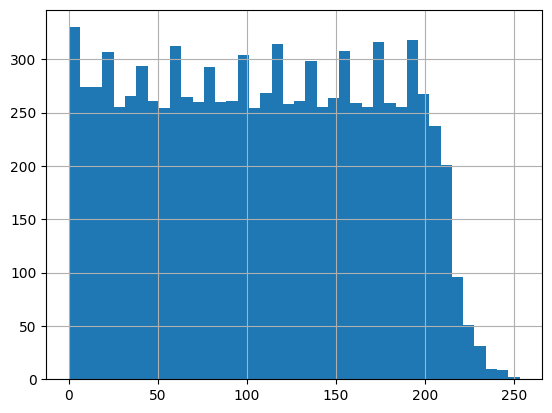

In [31]:
# Reject the null hypothesis for all continous variables apart from `Torque`. As the p-value suggests fairly strong evidence for a normal distribution for `Torque`
# ignore UDI, as it is a label rather than a explanatory variable for `Machine failure`
# visualise the skew for the variables of interest 
    # Air temperature [K]
    # Process temperature [K]
    # Rotational speed [rpm]
    # Tool wear [min]

# create histograms and qq plots for each

plott = Plotter(failure_data_without_null)

skewed_variables = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]']
skewed_variables

for i in skewed_variables:
    print(i)
    plott.plot_hist(i)
    
 

    






- Rotational speed [rpm]
- Tool wear [min]



#### Air temperature

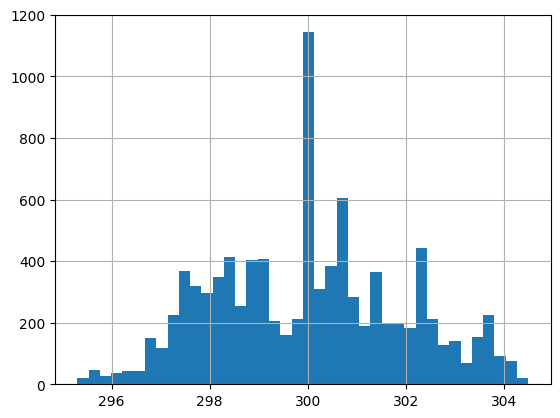

In [32]:
plott.plot_hist('Air temperature [K]')

- `Air temperature [K]`, contains 3 spikes, this likly to for each `Type`. Where the Air temperature is higher 'High' quality products and the converse for low quality products 

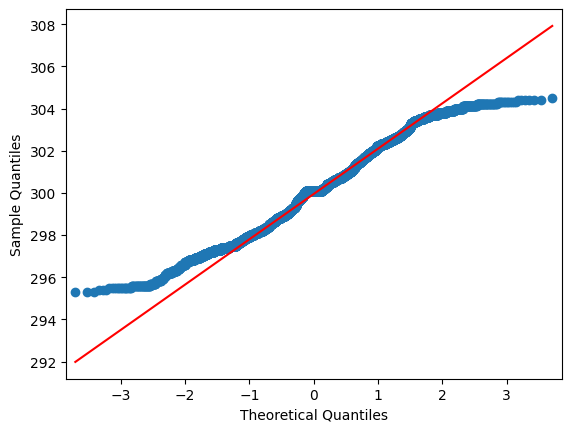

In [233]:
plot.plot_qq('Air temperature [K]')

In [ ]:
- Air Temperature Q-Q plot shows that there is deviation from in the lower and upper quartiles of the data set.

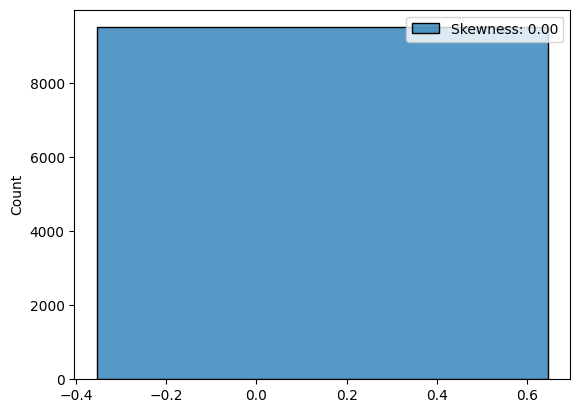

In [245]:
# treating the skewness in Air temperature 
# Box-Cox Transformation. 
    # Motivation - out data is positive 

boxcox_air = failure_data['Air temperature [K]']
boxcox_air = stats.boxcox(boxcox_air) 
boxcox_air = pd.Series(boxcox_air[0])
t=sns.histplot(boxcox_air,label="Skewness: %.2f"%(boxcox_air.skew()) )
t.legend()
# boxcox_air = pd.Series(boxcox_air[0])

In [248]:
# boxcox transformation, did not work as expected, this is because the variance is relatively small, the points are all concentrated. 

failure_data_without_null['Air temperature [K]']

0       301.4
1       300.6
2       299.2
3       298.9
4       298.1
        ...  
9995    297.3
9996    301.6
9997    301.6
9998    300.1
9999    300.7
Name: Air temperature [K], Length: 9516, dtype: float64

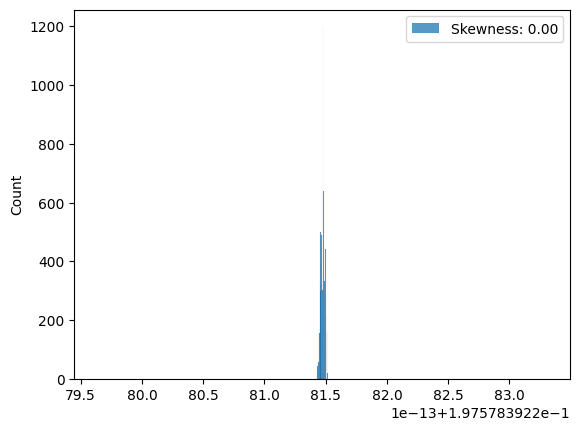

In [253]:
# Yeo Johnson transformation
from scipy.stats import yeojohnson
yeojohnson_air = failure_data_without_null['Air temperature [K]']
yeojohnson_air = stats.yeojohnson(yeojohnson_air)
yeojohnson_air= pd.Series(yeojohnson_air[0])
t=sns.histplot(yeojohnson_air,label="Skewness: %.2f"%(yeojohnson_air.skew()) )
t.legend()


In [ ]:
# The YeoJohnson transformation has successfully transformed the data to be symmetrical. The closer the value to zero, the more symmetrical the data. 


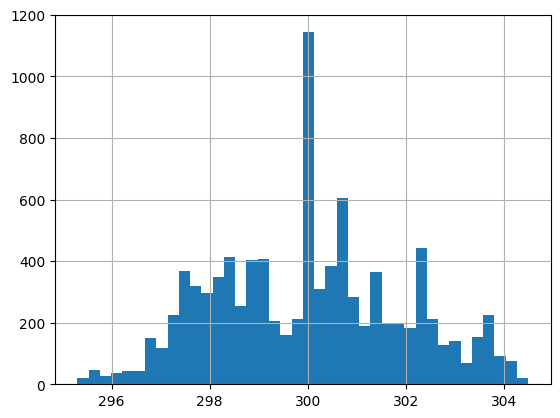

In [250]:
# compare with original distrubution 
plot.plot_hist('Air temperature [K]')

#### Process Temperature [K]

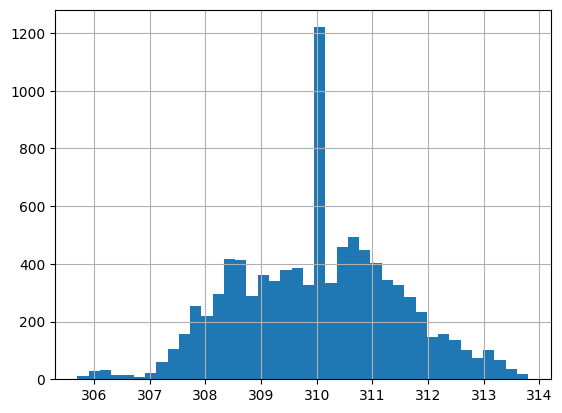

In [229]:
plot.plot_hist('Process temperature [K]')

- Process temperature [K], contains a spike around 310K and slightly negative skew. This is expected as the increase in temperature maybe due to the variation of products involved, as the quality increases, the process temperature increases. Investigate this with a scatter plot of `Type` vs temperature variables.

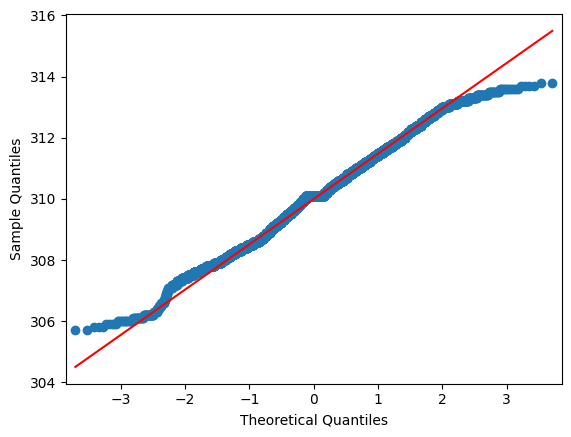

In [254]:
plot.plot_qq('Process temperature [K]')

In [269]:
# info.continous_variables()

# failure_data_without_null['Air temperature [K]'].skew()

for i in info.continous_variables():
    print('\n')
    print(i)
    skew = failure_data_without_null[i].skew()
    print(skew)
    if skew > 0.1 or skew < -0.1:
        print('data is skewed and needs treatment')



UDI
0.0033293589128570765


Air temperature [K]
0.11043255363188566
data is skewed and needs treatment


Process temperature [K]
-0.012381712928487951


Rotational speed [rpm]
2.020381768133672
data is skewed and needs treatment


Torque [Nm]
-0.014858886515454698


Tool wear [min]
0.02118344958093237


### Rotational speed and Air temperature are the only variables with Skewness. 

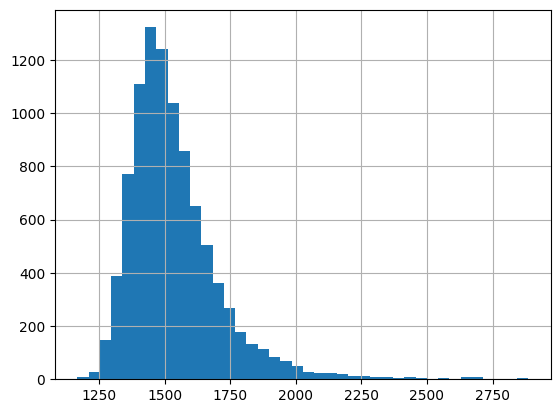

histogram shows a positive skew and supports the skew test


In [272]:
# Rotational speed 

plot.plot_hist('Rotational speed [rpm]')
print('histogram shows a positive skew and supports the skew test')

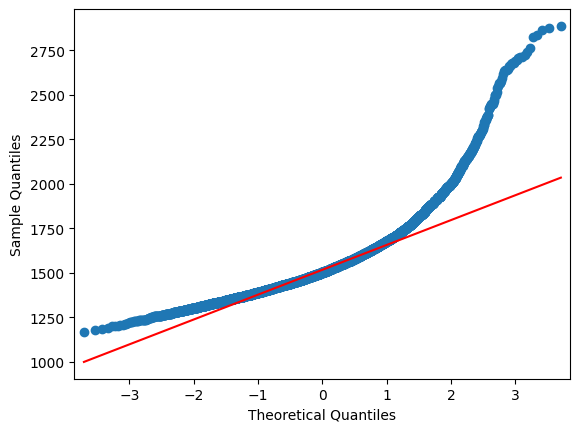

Severe deviation in the upper bound of the data. Slight deviation in the lower bound
proceed with transformation


In [274]:
plot.plot_qq('Rotational speed [rpm]')
print('Severe deviation in the upper bound of the data. Slight deviation in the lower bound')
print('proceed with transformation')

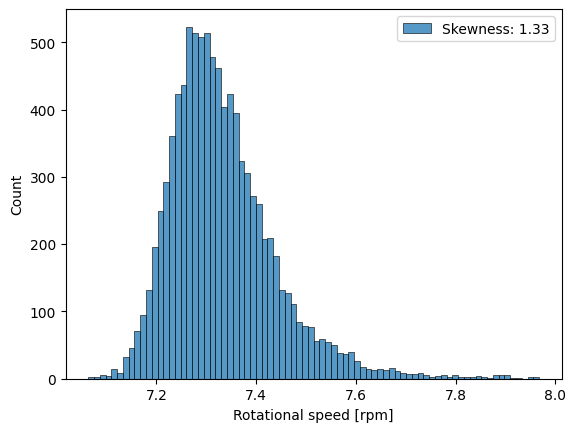

In [275]:
# As the data is positive and rightly skewed, proceed with a box cox transformation 
log_rotational_speed = failure_data_without_null['Rotational speed [rpm]'].map(lambda i: np.log(i) if i > 0 else 0)
t = sns.histplot(log_rotational_speed, label="Skewness: %.2f"%(log_rotational_speed.skew()))
t.legend()
print("skewness has been reduced, the data is still not symmetrical, proceed with Box-Cox Transformations ")

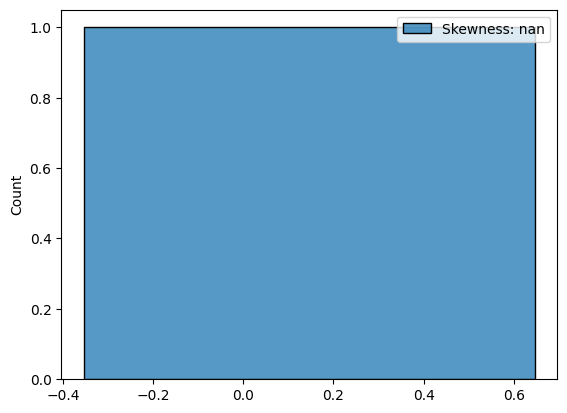

In [280]:
boxcox_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
boxcox_rotational_speed = stats.boxcox(boxcox_rotational_speed)
boxcox_rotational_speed = pd.Series(boxcox_population[0])
t = sns.histplot(boxcox_rotational_speed, label="Skewness: %.2f"%(boxcox_rotational_speed.skew()))
t.legend()

# boxcox_rotational_speed.head()

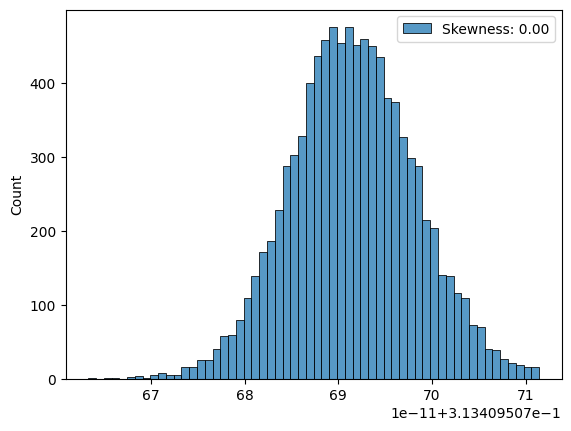

In [282]:
yeojohnson_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
yeojohnson_rotational_speed = stats.yeojohnson(yeojohnson_rotational_speed)
yeojohnson_rotational_speed = pd.Series(yeojohnson_rotational_speed[0])
yeojohnson_rotational_speed_hist = sns.histplot(yeojohnson_rotational_speed, label = "Skewness: %.2f"%(yeojohnson_rotational_speed.skew()))
yeojohnson_rotational_speed_hist.legend()



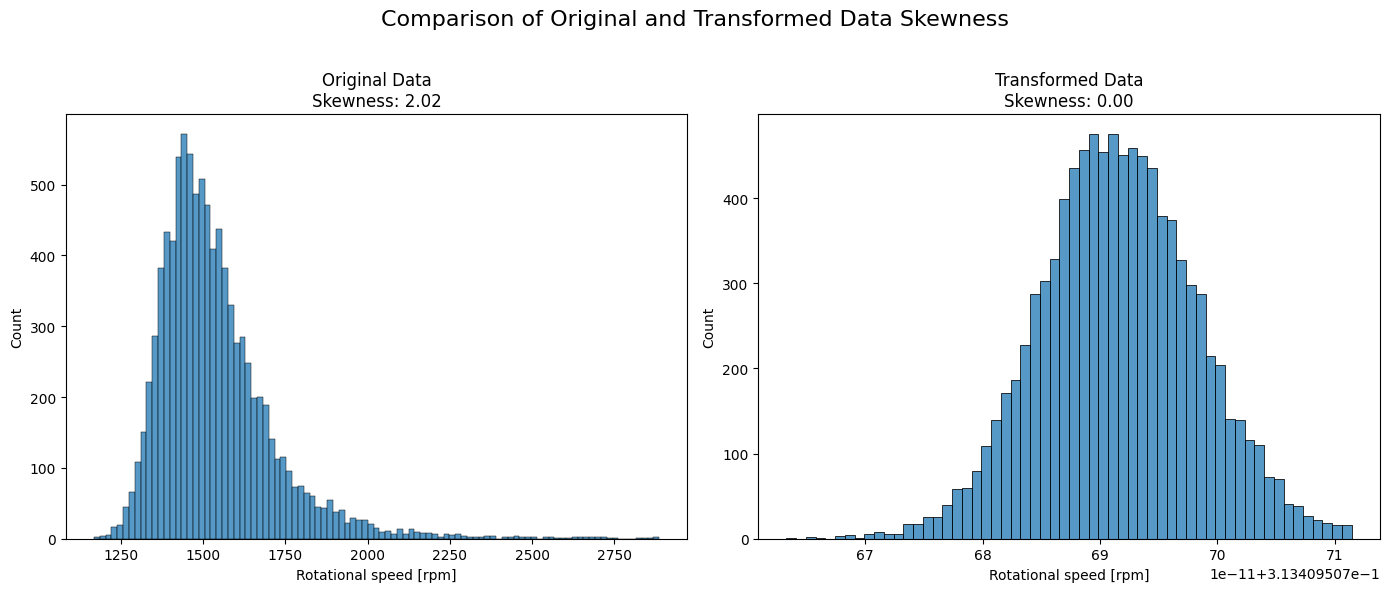

In [96]:
# Rotational Speed Side by side comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data histogram
sns.histplot(data=failure_data_without_null, x='Rotational speed [rpm]', ax=ax[0])
original_skewness = failure_data_without_null['Rotational speed [rpm]'].skew()
ax[0].set_title(f'Original Data\nSkewness: {original_skewness:.2f}')
ax[0].set_xlabel('Rotational speed [rpm]')
ax[0].set_ylabel('Count')

# Transformed data histogram
yeojohnson_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
yeojohnson_rotational_speed, _ = stats.yeojohnson(yeojohnson_rotational_speed)
yeojohnson_rotational_speed = pd.Series(yeojohnson_rotational_speed)
yeojohnson_rotational_speed_hist = sns.histplot(yeojohnson_rotational_speed, ax=ax[1])

transformed_skewness = yeojohnson_rotational_speed.skew()
ax[1].set_title(f'Transformed Data\nSkewness: {transformed_skewness:.2f}')
ax[1].set_xlabel('Rotational speed [rpm]')
ax[1].set_ylabel('Count')

# Show plot
plt.suptitle('Comparison of Original and Transformed Data Skewness', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [62]:
# data transformation 
yeojohnson_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
yeojohnson_rotational_speed, _ = stats.yeojohnson(yeojohnson_rotational_speed)
yeojohnson_rotational_speed = pd.Series(yeojohnson_rotational_speed)


<bound method Series.info of 0       0.31341
1       0.31341
2       0.31341
3       0.31341
4       0.31341
         ...   
9511    0.31341
9512    0.31341
9513    0.31341
9514    0.31341
9515    0.31341
Length: 9516, dtype: float64>

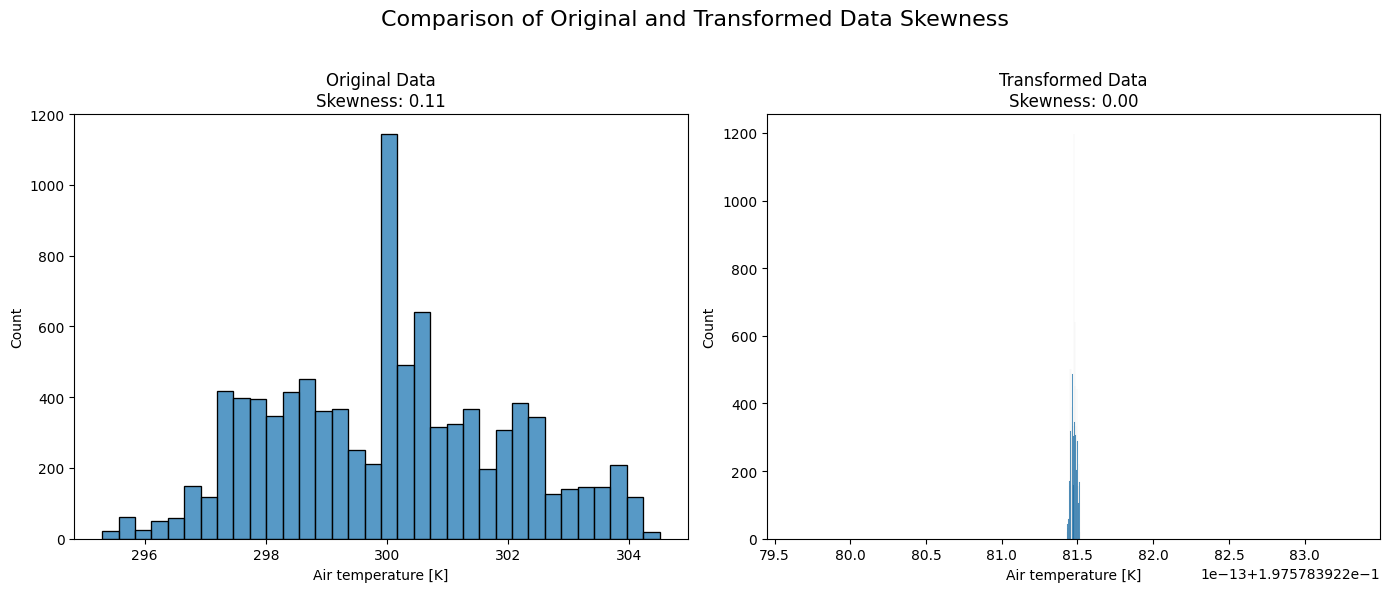

In [95]:
# Do the same for Air Temperature

# Side by side comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data histogram
sns.histplot(data=failure_data_without_null, x='Air temperature [K]', ax=ax[0])
original_skewness = failure_data_without_null['Air temperature [K]'].skew()
ax[0].set_title(f'Original Data\nSkewness: {original_skewness:.2f}')
ax[0].set_xlabel('Air temperature [K]')
ax[0].set_ylabel('Count')

# Transformed data histogram
yeojohnson_air = failure_data_without_null['Air temperature [K]']
yeojohnson_air, _ = stats.yeojohnson(yeojohnson_air) # The '_' ignores the second parameter, in this case it is the lambda parameter 
yeojohnson_air = pd.Series(yeojohnson_air)
yeojohnson_air_hist = sns.histplot(yeojohnson_air, ax=ax[1])
transformed_skewness = yeojohnson_air.skew()
ax[1].set_title(f'Transformed Data\nSkewness: {transformed_skewness:.2f}')
ax[1].set_xlabel('Air temperature [K]')
ax[1].set_ylabel('Count')

# Show plot
plt.suptitle('Comparison of Original and Transformed Data Skewness', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Next steps:
replace the yeojohnson transformation to air & rotational speed in the orginal data set 



#### Now use the DataTransformation class to add these transformations  

In [165]:
# Now use the DataTransformation class to add these transformations 

# class DataTransform:
#     def __init__(self, df):
#         self.df = df
#         self.info = df.info()

# yeojohnson_air = failure_data_without_null['Air temperature [K]']
# yeojohnson_air.isnull().

# yeojohnson_air, _ = stats.yeojohnson(yeojohnson_air) # The '_' ignores the second parameter, in this case it is the lambda parameter 
# yeojohnson_air = pd.Series(yeojohnson_air)
# yeojohnson_air

# Create a function for the transformation 
# def yeojohnson(df, column_name):
#     yeojohnson_var = df[column_name]
#     yeojohnson_var, _ = stats.yeojohnson(yeojohnson_var) # The '_' ignores the second parameter, in this case it is the lambda parameter 
#     yeojohnson_var = pd.Series(yeojohnson_var)
#     return yeojohnson_var

# # test 
# yeojohnson(failure_data_without_null, 'Air temperature [K]')

# sns.histplot(data=yeojohnson_air)


# test using the DT class 


# dt = DataTransform(failure_data_without_null)
# dt.yeojohnson('Air temperature [K]')
# dt.yeojohnson('Rotational speed [rpm]')
# reassign the column 

# Data transformation 

# Change the name of the data set for the skewnees transformatoin 




# failure_data_without_null['Air temperature [K]'] = dt.yeojohnson('Air temperature [K]')
# failure_data_without_null['Rotational speed [rpm]'] = dt.yeojohnson('Rotational speed [rpm]')

# # failure_data_without_null.head(10)
# print('The transformation for skewness has been made. The interpretability of `Air temperature [K]` and `Rotational speed` has reduced drastically')
# # failure_data_without_null.columns

# create a copy of the data set 
failure_data_cleaned_unskewed = failure_data_without_null.copy(deep=True)

# create a Datatransform instance 
dt = DataTransform(failure_data_cleaned_unskewed)

yeojohnson_air = dt.yeojohnson('Air temperature [K]')
yeojohnson_rotational_speed = dt.yeojohnson('Rotational speed [rpm]')

failure_data_cleaned_unskewed['Air temperature [K]'] = yeojohnson_air
failure_data_cleaned_unskewed['Rotational speed [rpm]'] = yeojohnson_rotational_speed

# failure_data_cleaned_unskewed.head()

# sum(failure_data_without_null['Air temperature [K]'].isnull())

<class 'pandas.core.frame.DataFrame'>
Index: 9516 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      9516 non-null   int64  
 1   Product ID               9516 non-null   object 
 2   Type                     9516 non-null   object 
 3   Air temperature [K]      9516 non-null   float64
 4   Process temperature [K]  9516 non-null   float64
 5   Rotational speed [rpm]   9516 non-null   int64  
 6   Torque [Nm]              9516 non-null   float64
 7   Tool wear [min]          9516 non-null   float64
 8   Machine failure          9516 non-null   int64  
 9   TWF                      9516 non-null   int64  
 10  HDF                      9516 non-null   int64  
 11  PWF                      9516 non-null   int64  
 12  OSF                      9516 non-null   int64  
 13  RNF                      9516 non-null   int64  
 14  H                        9516

In [169]:
print('original data set ')
print('\n')
print(failure_data_without_null[['Air temperature [K]', 'Rotational speed [rpm]']])

original data set 


      Air temperature [K]  Rotational speed [rpm]
0                   301.4                    1579
1                   300.6                    1635
2                   299.2                    1700
3                   298.9                    1561
4                   298.1                    1634
...                   ...                     ...
9995                297.3                    1369
9996                301.6                    1510
9997                301.6                    1408
9998                300.1                    1427
9999                300.7                    1336

[9516 rows x 2 columns]


In [171]:
print('After skewness transformations')
print('\n')
print(failure_data_cleaned_unskewed[['Air temperature [K]', 'Rotational speed [rpm]']])
print('\n')
print('The transformation for skewness has been made. The interpretability of `Air temperature [K]` and `Rotational speed` has reduced drastically')

# Ask khushboo how tp sort this out.
# TODO: need to change the df  name for after skewness has been applied, this is so that the code is reproducible 

After skewness transformations


      Air temperature [K]  Rotational speed [rpm]
0                0.197578                 0.31341
1                0.197578                 0.31341
2                0.197578                 0.31341
3                0.197578                 0.31341
4                0.197578                 0.31341
...                   ...                     ...
9995                  NaN                     NaN
9996                  NaN                     NaN
9997                  NaN                     NaN
9998                  NaN                     NaN
9999                  NaN                     NaN

[9516 rows x 2 columns]


The transformation for skewness has been made. The interpretability of `Air temperature [K]` and `Rotational speed` has reduced drastically


In [176]:
info_after_skew_transformation = DataFrameInfo(failure_data_cleaned_unskewed)
print(info_after_skew_transformation.percentage_of_null()[['Air temperature [K]', 'Rotational speed [rpm]']])

print('There is now NaN values in the data set, be aware for the machine learning')

Air temperature [K]       4.844472
Rotational speed [rpm]    4.844472
dtype: float64
There is now NaN values in the data set, be aware for the machine learning


## Removing Outliers from the Data 

### ideas
- scatter plots 
- Violin plots 
- box plots 
- stick to analysis for continous variables 

In [182]:
info = DataFrameInfo(failure_data_cleaned_unskewed)
info.continous_variables()

continous_variables = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]']

 # Note the following variables were not included because they are either strings or unique keys, both have no statistical significance
    #'UDI',
    #'Product ID',
    #'Type'

continous_variables


['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [332]:
# scatter plot 

# for i in continous_variables:
#     print(i)
#     print(sns.scatterplot(failure_data_without_null[i]))


# sns.scatterplot(failure_data_without_null['Air temperature [K]'])

# plott = Plotter(failure_data_without_null)
# plott.scatter('Air temperature [K]')

# Do this for the rest of the variables too 
# decide whether or not use the df treated for skew 


In [333]:
# # using the df treated for skew 
# plott = Plotter(failure_data_cleaned_unskewed)
# plott.scatter('Air temperature [K]')

In [198]:
continous_variables

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [331]:
# # Scatter plots of continous variables 
# plott = Plotter(failure_data_cleaned_unskewed)

# for i in continous_variables:
#     print(i)
#     plott.scatter(i)

In [ ]:
## Scatter plot analysis:

# 'Air temperature [K]'
# - No visible outliers

# 'Process temperature [K]'
# - Outliers in the upper & lower bounds 

# 'Rotational speed [rpm]'
# -Outliers in the upper & lower bounds Outliers in the upper & lower bounds 

# 'Torque [Nm]'
# - Outliers in the upper & lower bounds Outliers in the upper & lower bounds 

# 'Tool wear [min]'
# - Outliers in the upperbound 


##### Boxplot was more useful to see outliers

['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


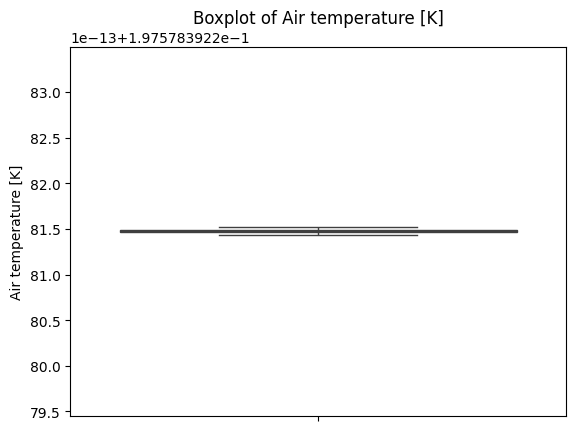

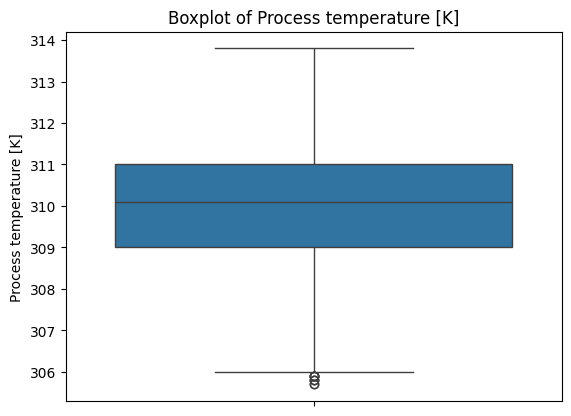

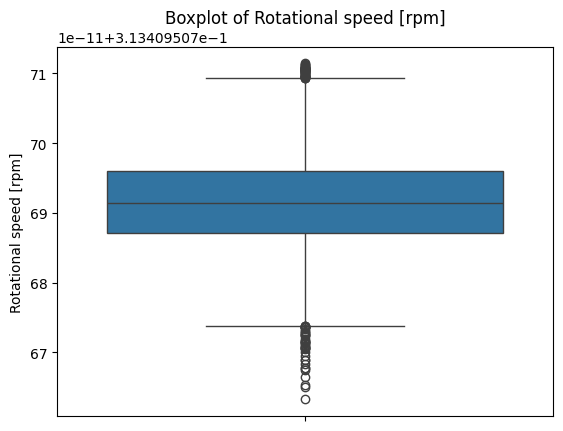

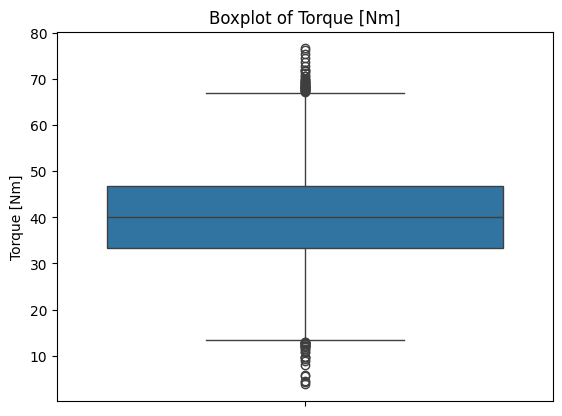

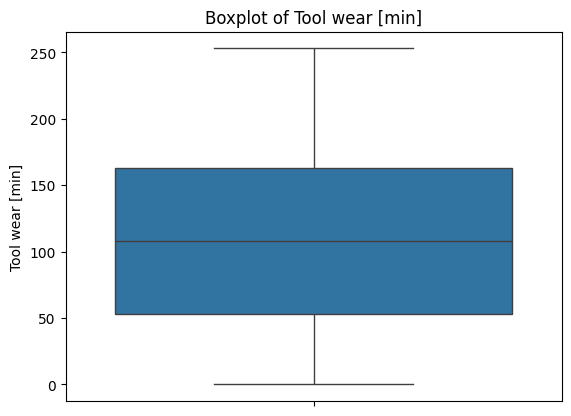

In [247]:
# box plots of continous variables 
# plott = Plotter(failure_data_cleaned_unskewed)

# for i in continous_variables:
#     print(i)

print(continous_variables)

for i in continous_variables:
    plt.figure()
    sns.boxplot(failure_data_cleaned_unskewed[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

# Note: Boxplot is a much better visual representation, do z score analysis for 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'




- Boxplots for Air Temperature & Torque variables show no significant outliers. 
- Boxplots for 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]' do show outliers, proceed with z-score analysis to segment potential outliers 

## Z - Score analysis for `Process temperature [K]`, `Rotational speed [rpm]` and `Torque [Nm]`

## Process Temperature

In [278]:
# def z_score(df, column): # takes in a column and creates z scores, 
#     x = df[column] 
#     mean= np.mean(x)
#     standard_deviation = np.std(x)
#     z_scores = (x - mean) / standard_deviation
#     return z_scores

# z_score(failure_data_cleaned_unskewed, 'Process temperature [K]').tail(10)
# # Add this to DT class 
    


       UDI  Process temperature [K]  z_scores
9990  9043                    308.4 -1.143308
9991   138                    308.6 -1.002286
9992  6650                    310.4  0.266904
9993  1383                    310.1  0.055373
9994  9314                    309.4 -0.438202
9995  9018                    308.1 -1.354839
9996  3339                    310.9  0.619457
9997  5771                    311.2  0.830989
9998  3056                    309.2 -0.579223
9999  6026                    311.0  0.689968
Axes(0.125,0.11;0.775x0.77)


/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_24976/2851013325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udi_process_temp_df_z['z_scores'] = z_scores_process_temp


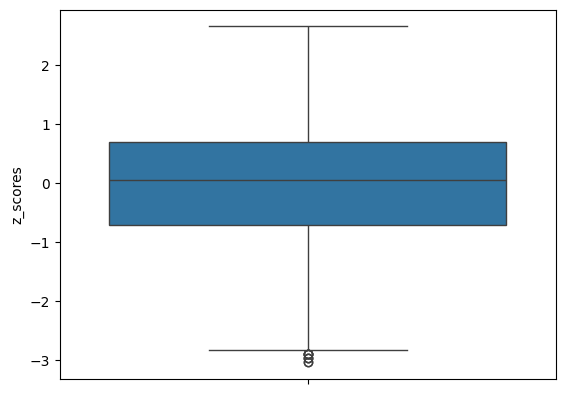

In [250]:
# Statistcal Methods for outlier detection 
udi_process_temp_df = failure_data_cleaned_unskewed[['UDI','Process temperature [K]']]
process_temp = udi_process_temp_df['Process temperature [K]']

# process_temp.head()
mean_process_temp = np.mean(process_temp)
std_process_temp = np.std(process_temp)
z_scores_process_temp = (process_temp - mean_process_temp) / std_process_temp

# change the name of the dataframe 
udi_process_temp_df_z = udi_process_temp_df

# Add the z-scores to the dataframe as a new column:
udi_process_temp_df_z['z_scores'] = z_scores_process_temp

print(udi_process_temp_df_z.tail(10))
print(sns.boxplot(udi_process_temp_df_z['z_scores']))

In [ ]:
- There are outliers below -3 for the Z scores.

In [251]:
# # Statistcal Methods for outlier detection 
# process_temp_df = failure_data_cleaned_unskewed[['UDI','Process temperature [K]']]

# # process_temp.head()
# mean_process_temp = np.mean(process_temp_df['Process temperature [K]'])
# std_process_temp = np.std(process_temp_df['Process temperature [K]'])
# z_scores_process_temp = (process_temp_df['Process temperature [K]'] - mean_process_temp) / std_process_temp
# process_temp_df_z = process_temp_df

# # Add the z-scores to the dataframe as a new column:
# process_temp_df_z['z_scores'] = z_scores_process_temp

# print(process_temp_df_z.tail(10))

# print(sns.scatterplot(process_temp_df_z['z_scores']))

# # change variable names 

In [312]:
# isolate outliers 

# outliers_2 = []
# outliers_3 = []

# for i in process_temp_df_z['z_scores']:
#     if i < -2:
#         outliers_2.append(i)
#     if i > 2:
#         outliers_2.append(i)

# Z-score Threshold 
threshold_2 = 2 
threshold_3 = 3 

z_scores = udi_process_temp_df_z['z_scores']

outliers_2 = process_temp_df_z[np.abs(z_scores) > threshold_2]
outliers_3 = process_temp_df_z[np.abs(z_scores) > threshold_3]

percentage_outliers_thereshold_2 = round(len(outliers_2)/len(process_temp_df_z) * 100, 2)
percentage_outliers_thereshold_3 = round(len(outliers_3)/len(process_temp_df_z) * 100, 2)


# print(f"Percentage of observations with outliers based on z-score threshold ±2: {round(len(outliers_2)/len(process_temp_df_z) * 100, 2)}")
# print(f"Percentage of observations with outliers based on z-score threshold ±3: {round(len(outliers_3)/len(process_temp_df_z) * 100, 2)}")

print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")

# TODO: convert this into a function and add to the relevant classes 
    # func for z-scores of a variable 
    # func z_score_info

Percentage of observations with outliers based on z-score threshold ±2: 4.07
Percentage of observations with outliers based on z-score threshold ±3: 0.02


#### Choosing between a Z-Score Threshold of 2 and 3 
- Given that we dealing with failure data in the manufacturing process, the conseqences of missing a potential failure can be severe. 
- Therefore, consider the more sensitive approach of a threshold of 2.

Pros: more sensitive to deteching smaller anomalies which might be early indicators of potential failures

Cons: Higher number of false positives, meaning more frequent alerts and possibly unnecessary inspections or interventions

Suggested approach (Post implementation):
- Begin with a z-score of 2 i.e. beginning more conservative and increasing based on future data.
- Monitor & Adjust: monitor the alerts and evaluate the relevance of outliers.

#### Filtering 

In [329]:
#filter out the outliers of Process Temperature from our main data set
outliers_2

#failure_data_cleaned_unskewed['UDI'].head()

mask = ~failure_data_cleaned_unskewed['UDI'].isin(outliers_2['UDI'])

mask.sum()
failure_data_cleaned_unskewed_no_outliers = failure_data_cleaned_unskewed[mask]


print('Number of rows of original df:')
print(len(failure_data_cleaned_unskewed))
print('\n')
print('Number of rows after filtering the Outliers of the Process Temperature:')
print(len(failure_data_cleaned_unskewed_no_outliers))

Number of rows of original df:
9516


Number of rows after filtering the Outliers of the Process Temperature:
9129


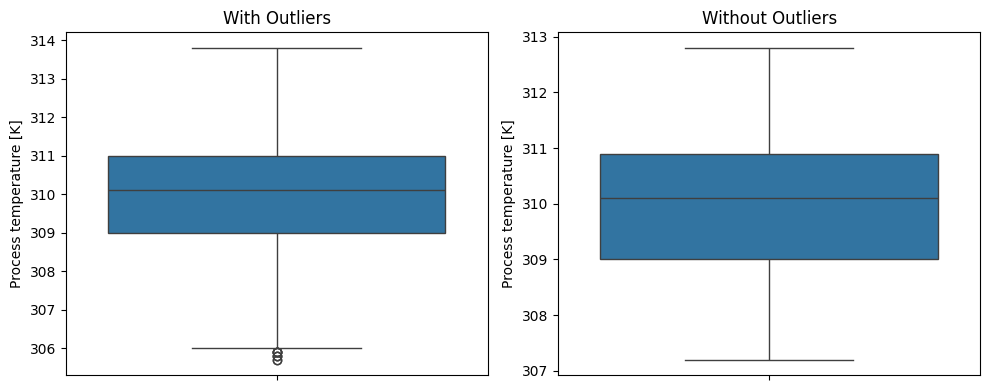

In [351]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# First plot: With outliers
sns.boxplot(data=failure_data_cleaned_unskewed, y='Process temperature [K]', ax=axes[0])
axes[0].set_title('With Outliers')

# Second plot: Without outliers
sns.boxplot(data=failure_data_cleaned_unskewed_no_outliers, y='Process temperature [K]', ax=axes[1])
axes[1].set_title('Without Outliers')

# Display the plots
plt.tight_layout()
plt.show()

In [350]:
# plott_1 = Plotter(failure_data_cleaned_unskewed)
# plott_1.boxplot('Process temperature [K]')

# plott_2 = Plotter(failure_data_cleaned_unskewed_no_outliers)
# plott_2.boxplot('Process temperature [K]')

### Updating classes with z_score and z_score_info functions

In [330]:
# adding a function that gives z score information to the DataInformation Class

def z_score_info(z_scores):
    # Z-score Threshold 
    threshold_2 = 2 
    threshold_3 = 3
    # z_scores = udi_process_temp_df_z['z_scores']

    outliers_2 = (np.abs(z_scores) > threshold_2).sum() 
    outliers_3 = (np.abs(z_scores) > threshold_3).sum()


    percentage_outliers_thereshold_2 = round(outliers_2/len(z_scores) * 100, 2)
    percentage_outliers_thereshold_3 = round(outliers_3/len(z_scores) * 100, 2)

    print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_2}")
    print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
    print("\n")
    print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_3}")
    print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")

# testing 

#create z_scores 
# dt = DataTransform(failure_data_cleaned_unskewed)
# dt.z_score('Process temperature [K]').tail(10)
# z_scores_test = z_score(failure_data_cleaned_unskewed, 'Process temperature [K]')

# z_score_info(z_scores_test)
# # boolean_values = np.abs(z_scores_test) > 3
# boolean_values.sum()




In [334]:
# Testing the z_score_info()
# dt = DataTransform(failure_data_cleaned_unskewed)
# dt.z_score('Process temperature [K]')
# z_scores_test = z_score(failure_data_cleaned_unskewed, 'Process temperature [K]')

# info = DataFrameInfo(failure_data_cleaned_unskewed)
# info.z_score_info(z_scores_test)
# # info.z_score_info() # problem with class 


In [307]:
# class DataFrameInfo:
#     def __init__(self, df):
#         self.df = df 
#     def z_score_info(self, z_scores):
#         # Z-score Threshold 
#         threshold_2 = 2 
#         threshold_3 = 3
#         # z_scores = udi_process_temp_df_z['z_scores']

#         outliers_2 = (np.abs(z_scores) > threshold_2).sum() 
#         outliers_3 = (np.abs(z_scores) > threshold_3).sum()

#         percentage_outliers_thereshold_2 = round(outliers_2/len(z_scores) * 100, 2)
#         percentage_outliers_thereshold_3 = round(outliers_3/len(z_scores) * 100, 2)

#         print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_2}")
#         print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
#         print("\n")
#         print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_3}")
#         print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")

## Rotational speed

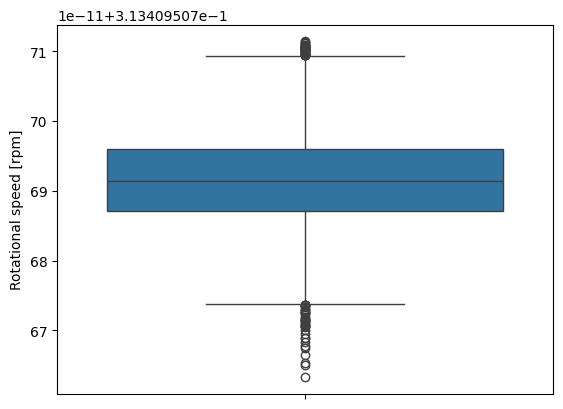

Outliers in both upper and lower bounds of the data


In [355]:
# rename data set 
failure_data_cleaned_v2 = failure_data_cleaned_unskewed_no_outliers
plott = Plotter(failure_data_cleaned_v2)
plott.boxplot('Rotational speed [rpm]')

print('Outliers in both upper and lower bounds of the data')


Number of NULL values in Rotational Speed z-scores
446


Number of NULL values in Rotational Speed z-scores after dropping NULL values
0


Text(0.5, 1.0, 'Rotational speed Z-Scores ')

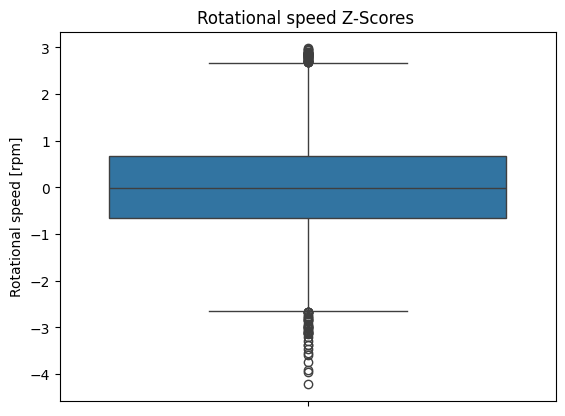

In [406]:
# z score analysis

dt = DataTransform(failure_data_cleaned_v2)
rotational_speed_z = dt.z_score('Rotational speed [rpm]')

print('Number of NULL values in Rotational Speed z-scores')
print(rotational_speed_z.isnull().sum()) # 446 null values 

# drop null values for the analysis 
rotational_speed_z_cleaned = rotational_speed_z.dropna()

print('\n')
print('Number of NULL values in Rotational Speed z-scores after dropping NULL values')
print(rotational_speed_z_cleaned.isnull().sum())

sns.boxplot(rotational_speed_z_cleaned).set_title('Rotational speed Z-Scores ')


# rotational_speed_z_cleaned
# plott = Plotter(failure_data_cleaned_v2)
# plott.boxplot(rotational_speed_z_cleaned )

# Many null values 


# process_temp_test = dt.z_score('Process temperature [K]')
# process_temp_test.isnull().sum()
# no null values for process temp's z scores 


# info = DataFrameInfo(failure_data_cleaned_v2)
# info.z_score_info(rotational_speed_z) 

# filtering 

Number of NULL values in Rotational Speed z-scores POST Skew Transoformation
446


Text(0.5, 1.0, 'Rotational speed Z-Scores ')
UDI case `1271` BEFORE treating for skew:
1490


UDI case `1271` AFTER treating for skew:
nan


/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_24976/21754571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotational_speed['z_scores'] = dt.z_score('Rotational speed [rpm]')


0       0.489993
1       0.796927
2       1.102182
3       0.381337
4       0.791827
          ...   
9511   -1.191577
9512    0.043149
9513   -0.797525
9514   -0.621574
9515   -1.563720
Name: z_scores, Length: 8683, dtype: float64

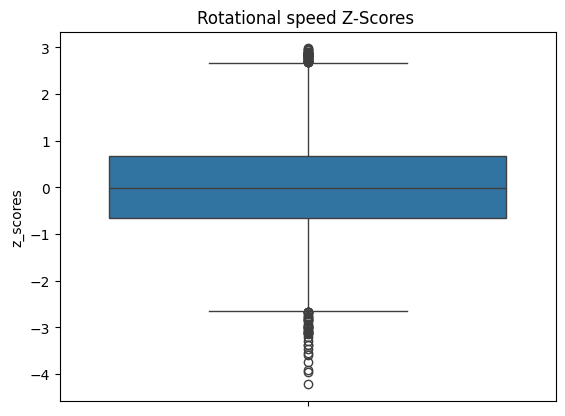

In [445]:
# Next steps:
# Note here: could we consider removing only the upper boiund
# drop rows based on the outliers for the rotational speed 

rotational_speed = failure_data_cleaned_v2[['UDI', 'Rotational speed [rpm]']]

dt = DataTransform(rotational_speed)
rotational_speed['z_scores'] = dt.z_score('Rotational speed [rpm]')
rotational_speed

print('Number of NULL values in Rotational Speed z-scores POST Skew Transoformation')
print(rotational_speed['z_scores'].isnull().sum()) # 446 null, need to drop 
print('\n')
# Boxplot 
print(sns.boxplot(rotational_speed['z_scores']).set_title('Rotational speed Z-Scores '))

# take a look at why there are NULL values when
# deep dive into 1 use case 
rotational_speed[rotational_speed['z_scores'].isnull()].iloc[0]

rotational_speed[rotational_speed['z_scores'].isnull()].iloc[0]['UDI'] # UDI 1272

rotational_speed[rotational_speed['UDI'] == 1272] # Rotational speed has NaN values after the skewness transformation. 


# check orginal data frame 
rotational_speed_value_udi_1272 = failure_data_without_null.loc[failure_data_without_null['UDI'] == 1272, 'Rotational speed [rpm]'].values[0]

print('UDI case `1271` BEFORE treating for skew:')
print(rotational_speed_value_udi_1272)
print('\n')
rotational_speed_value_udi_1272_after_skew = failure_data_cleaned_unskewed.loc[failure_data_cleaned_unskewed['UDI'] == 1272, 'Rotational speed [rpm]'].values[0]
print('UDI case `1271` AFTER treating for skew:')
print(rotational_speed_value_udi_1272_after_skew )

##########################################
# Use the less stringent -3 & 3 Z_score threshold 

# Adapt z_score_info function to input the z-score threshold via the user

# filter for z scores of absoulte value 

# def z_score_outliers( z_score, abs_threshold = [[2,3]]):
#     outliers = np.abs(z_score) > abs_threshold 
#     return outliers 


# z_score_outliers(rotational_speed_z_cleaned, abs_threshold=3)

# not a good approach, adapt func to include data set where we can put in a key which in our case UDI 

# failure_data_cleaned_v2

# PICKUP: Continue with dropping outliers for Rotational speed & the last continous variable
# move onto task 6 





### Dopping NULL values in the Rotational speed variable

In [457]:

# The transformation to treat skewness has produced NULL values
# For simplicity I will drop the rows for these NULL values

# Drop null values 
rotational_speed_clean = rotational_speed[rotational_speed['z_scores'].notnull()]

# list of UDIs to keep
udi_to_keep = rotational_speed_clean['UDI']

# create a boolean mask to identify rows to keep 
mask = failure_data_cleaned_v2['UDI'].isin(udi_to_keep)
# mask.value_counts()

# filtered data frame 
failure_data_cleaned_v3 = failure_data_cleaned_v2[mask]

8683

In [465]:
# testing the transformation
print(f"length before filtering: {len(failure_data_cleaned_v2)}")
print(f"length after dropping NULL values in Rotational speed: {len(failure_data_cleaned_v3)}")

print('Number of missing values in Rotational speed:')
print(failure_data_cleaned_v3['Rotational speed [rpm]'].isnull().sum())


length before filtering: 9129
length after dropping NULL values in Rotational speed: 8683
Number of missing values in Rotational speed:
0


In [496]:
# do the z-score analysis with the cleaned data set
rotational_speed_v3 = failure_data_cleaned_v3[['UDI', 'Rotational speed [rpm]']]

dt = DataTransform(rotational_speed_v3)
rotational_speed_v3['z_scores'] = dt.z_score('Rotational speed [rpm]')

# check that there are no null values 
rotational_speed_v3.isnull().sum()

# sns.boxplot(rotational_speed_v3['z_scores']) 


# TODO: remove outliers based on a threshold of 3 

# boolean of outliers 
rotational_speed_outliers_mask = np.abs(rotational_speed_v3['z_scores']) > 3
rotational_speed_outliers = rotational_speed_v3[rotational_speed_outliers_mask]

rotational_speed_outliers['UDI']

# rotational_speed_outliers.value_counts()

# # mask = failure_data_cleaned_v3['UDI'].isin(rotational_speed_outliers['UDI'])
# # mask.value_counts()

# mask = ~rotational_speed_outliers 
# mask.value_counts()



# Aim;
# df with UDI and  


# # filter
# # manish

##############################################################################
# Idea 
#filter out the outliers of Process Temperature from our main data set
# outliers_2

# #failure_data_cleaned_unskewed['UDI'].head()

# mask = ~failure_data_cleaned_unskewed['UDI'].isin(outliers_2['UDI'])

# mask.sum()
# failure_data_cleaned_unskewed_no_outliers = failure_data_cleaned_unskewed[mask]

##############################################################################


# rotational_speed_removed_outliers = rotational_speed_v3[rotational_speed_outliers]

# sns.boxplot(rotational_speed_removed_outliers['z_scores'])



# info = DataFrameInfo(rotational_speed_v3)
# info.z_score_info('Rotational speed [rpm]')

/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_24976/67573055.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotational_speed_v3['z_scores'] = dt.z_score('Rotational speed [rpm]')


,UDI,Rotational speed [rpm],z_scores
22,8571,0.31341,-3.079822
392,9393,0.31341,-3.593030
847,9747,0.31341,-3.147597
1525,9199,0.31341,-3.012952
2772,7556,0.31341,-4.223068
3198,9828,0.31341,-3.199043
3784,9715,0.31341,-3.374421
3813,749,0.31341,-3.096674
3860,6980,0.31341,-3.958478
3908,2124,0.31341,-3.555961


<Axes: ylabel='z_scores'>

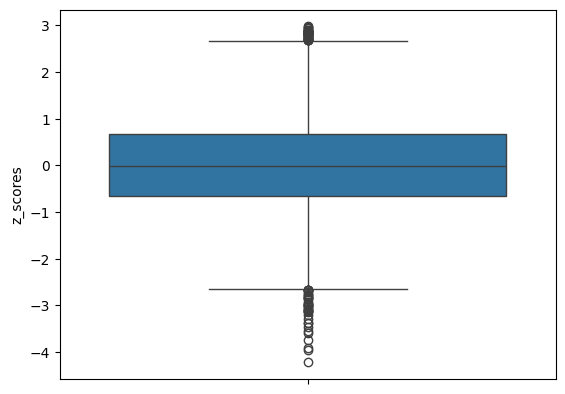

In [502]:

# Step 1: Extract the list of UDIs from the outliers DataFrame
outliers_udis = rotational_speed_outliers['UDI'].tolist()

# Step 2: Filter the original DataFrame to exclude the rows with these UDIs
failure_data_cleaned_v3
mask = ~rotational_speed_v3 ['UDI'].isin(outliers_udis)

rotational_speed_no_outliers = rotational_speed_v3[mask]

# Display the filtered DataFrame
len(rotational_speed_no_outliers)

sns.boxplot(rotational_speed_no_outliers['z_scores'])
sns.boxplot(rotational_speed_v3['z_scores']) 


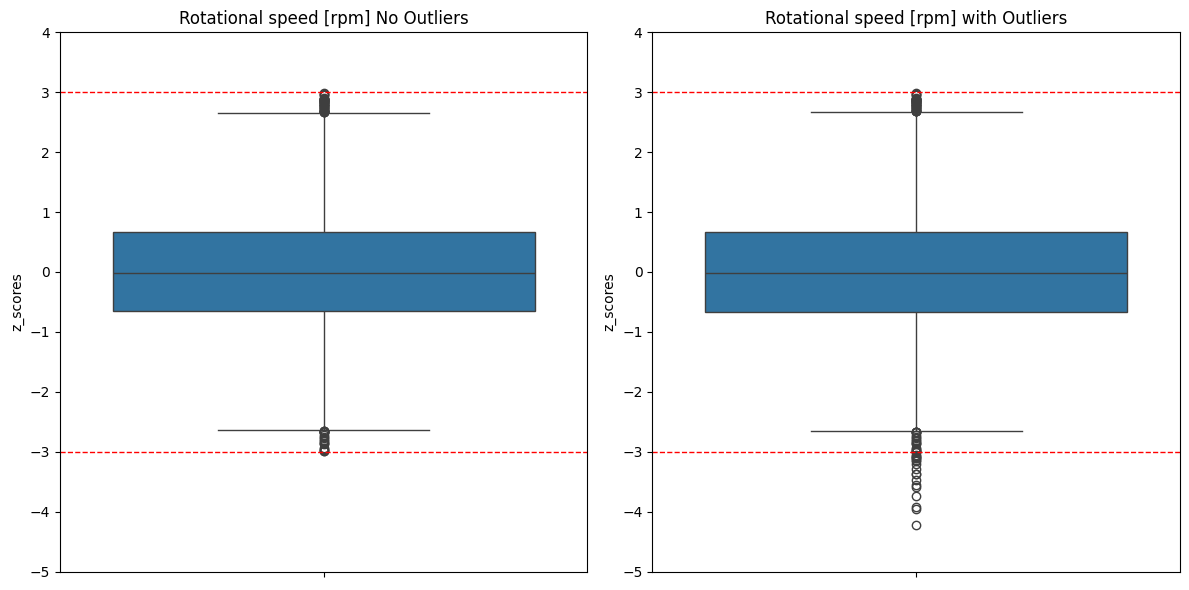

In [510]:
# Create subplots with a smaller figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Define the y-axis limits for both plots
y_limits = (-5, 4)

# First plot: No outliers
sns.boxplot(data=rotational_speed_no_outliers, y='z_scores', ax=axes[0])
axes[0].set_title('Rotational speed [rpm] No Outliers')
axes[0].set_ylim(y_limits)
axes[0].axhline(y=3, color='r', linestyle='--', linewidth=1)
axes[0].axhline(y=-3, color='r', linestyle='--', linewidth=1)

# Second plot: With outliers
sns.boxplot(data=rotational_speed_v3, y='z_scores', ax=axes[1])
axes[1].set_title('Rotational speed [rpm] with Outliers')
axes[1].set_ylim(y_limits)
axes[1].axhline(y=3, color='r', linestyle='--', linewidth=1)
axes[1].axhline(y=-3, color='r', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()


In [514]:
# make changes to data set i.e. the filtering etc.
# first begin with reproducing the above plot using the failure_data df's, as using a subset for the plots will create issues later on, check this for the Air temperature variable too.

failure_data_cleaned_v4['Rotational speed [rpm]'].isnull().sum()
len(failure_data_cleaned_v4)

# Idea: look at the relationship of machine failures with the upperbounds of the continous variables.

8663

# Scratch work

In [197]:
# def continous_variables(df):
#     continous_variables = []
#     for i in df.columns:
#         if df[i].nunique() > 2:
#             continous_variables.append(i)
#     return continous_variables

In [198]:
# continous_variables(failure_data_without_null)

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [216]:

# variable_name = []
# variable_description = []


# for i in failure_data_without_null.columns:
#     variable_name.append(i)
#     if failure_data_without_null[i].nunique() > 2:
#         variable_description.append("continous data")
#     else:
#         variable_description.append('other data type')



# variable_info = pd.DataFrame({
#     'variable_name': variable_name,
#     'variable_description': variable_description
# })

# display(variable_info)

# Analysis & visualisatoin ideas 

In [ ]:
# EDA ideas 

# check the balance of the data set for `machine failure` variable.
    # do this is with a bar chart 
# Do a correlation matrix of all numerical variables, where the dependant (y) variable is 'machine failure' 

# categorical plots 
# correcting the skew - do this first for the independant variables that have the highest correlation 
# count plots of our nominal category data (those with binary data)
# summary plots - pairplot 

In [6]:
failure_data_without_null['Machine failure'].value_counts()
# Data set is heavyly in balanced, this will cause a bias in ML 

Machine failure
0    9188
1     328
Name: count, dtype: int64

In [ ]:
# do this is with a bar chart 
# Do a correlation matrix of all numerical variables, where the dependant (y) variable is 'machine failure' 

# categorical plots 
# correcting the skew - do this first for the independant variables that have the highest correlation 
# count plots of our nominal category data (those with binary data)
# summary plots - pairplot 

# create a bar plot of purpose vs amount
sns.barplot(data=failure_data_after_transformations['Machine failure'])